# Amazon Electronics Data Analysis

In [1]:
#Importing libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS

# Set global formatting options
#mpl.rcParams['axes.formatter.useoffset'] = False

#Setting default options for the whole notebook
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 5000)
pd.set_option('mode.chained_assignment', None)

In [2]:
#Create a df of the cleaned data from the csv file
df_az = pd.read_csv('amazon_data_cleaned.csv')

In [3]:
#Double-checking if there are any null values 
df_az.isnull().sum()

asin                    0
product_name            0
seller_name             0
brand                   0
sales_price             0
discount_percentage     0
weight_grams            0
rating                  0
delivery_type           0
meta_keywords           0
amazon_prime__y_or_n    0
rank                    0
z-score                 0
dtype: int64

In [4]:
df_az.head()

,asin,product_name,seller_name,brand,sales_price,discount_percentage,weight_grams,rating,delivery_type,meta_keywords,amazon_prime__y_or_n,rank,z-score
0,B07652FT69,Cazcase Deer Pattern Smart Case Cover Flip Sta...,E Shop Solution,CAZCASE,8.39,46,308.0,3.8,fulfilled_by_amazon,Cazcase Deer Pattern Smart Case Cover Flip Sta...,Y,35464,-0.083474
1,B079VL519L,Heartly Kickstand Hard Dual Rugged Armor Hybri...,Ruh International,Heartly,3.59,77,49.9,4.6,fulfilled_by_amazon,Heartly Kickstand Hard Dual Rugged Armor Hybri...,Y,698934,-0.387184
2,B00JYKGFWY,"iPhone 6 Case, LUVVITT® ULTRA ARMOR iPhone 6 C...",HelloYehlo,Luvvitt,47.45,34,68.0,4.6,fulfilled_by_merchant,"iPhone 6 Case, LUVVITT® ULTRA ARMOR iPhone 6 C...",N,3181968,2.387965
3,B00LPC3O3M,"Verbatim Bravo Wired Notebook Optical Mouse, B...",G. G.,Verbatim,15.50,52,90.7,4.2,fulfilled_by_merchant,"Verbatim Bravo Wired Notebook Optical Mouse, B...",N,156041,0.366396
4,B07BV5K9TV,Aarfa Slimfit Durable Printed Hard Case for Xi...,arretail,Aarfa,3.58,70,49.9,3.9,fulfilled_by_merchant,Aarfa Slimfit Durable Printed Hard Case for Xi...,Y,373349,-0.387817


### Reviewing the basic Descriptive Statistics

In [5]:
#get a statistical summary of the data
df_az.describe()

,sales_price,discount_percentage,weight_grams,rating,rank,z-score
count,5033.000000,5033.000000,5033.000000,5033.000000,5.033000e+03,5033.000000
mean,7.683340,55.654878,150.122201,4.055633,5.212043e+05,-0.128187
std,9.333772,22.509870,336.719331,0.694399,6.478516e+05,0.590575
min,0.470000,0.000000,0.000000,1.000000,4.100000e+01,-0.584596
25%,2.990000,43.000000,40.800000,3.700000,8.688800e+04,-0.425148
50%,4.260000,60.000000,81.600000,4.000000,2.785240e+05,-0.344791
75%,8.390000,72.000000,150.000000,4.600000,7.168580e+05,-0.083474
max,57.040000,94.000000,8600.000000,5.000000,3.494351e+06,2.994752


In [6]:
df_az.median(numeric_only=True)

sales_price                 4.260000
discount_percentage        60.000000
weight_grams               81.600000
rating                      4.000000
rank                   278524.000000
z-score                    -0.344791
dtype: float64

In [7]:
df_az.skew(numeric_only=True)

sales_price             2.874075
discount_percentage    -0.887273
weight_grams           11.792254
rating                 -0.871256
rank                    2.198942
z-score                 2.874075
dtype: float64

#### Insights from the measures of central tendency, variability and asymmetry:
- The **mean selling price** leads us to belive that most of the products in the sample are **cheap and under $10**
- The variability of the numerical columns isn't abnormal
- The **average weight** of the products is **150g**
     * **low shipping and amazon fees**
- There's high average rating so the products in the sample may be worth selling on Amazon
- The price and weight are **Right skewed**
  * Consequently most of the data is concentrated on the left and the outliers are on the right

In [8]:
#the highest correlation is between price and weight but it's still not that significant
df_az.corr(numeric_only=True)

,sales_price,discount_percentage,weight_grams,rating,rank,z-score
sales_price,1.000000,-0.463257,0.232486,0.010231,0.154674,1.000000
discount_percentage,-0.463257,1.000000,-0.105919,0.019929,-0.116606,-0.463257
weight_grams,0.232486,-0.105919,1.000000,-0.019002,-0.042013,0.232486
rating,0.010231,0.019929,-0.019002,1.000000,0.077720,0.010231
rank,0.154674,-0.116606,-0.042013,0.077720,1.000000,0.154674
z-score,1.000000,-0.463257,0.232486,0.010231,0.154674,1.000000


### Plotting the Frequency Distribution of the Sales Price and Weight

Text(0.5, 1.0, 'Sales Price Distribution in $')

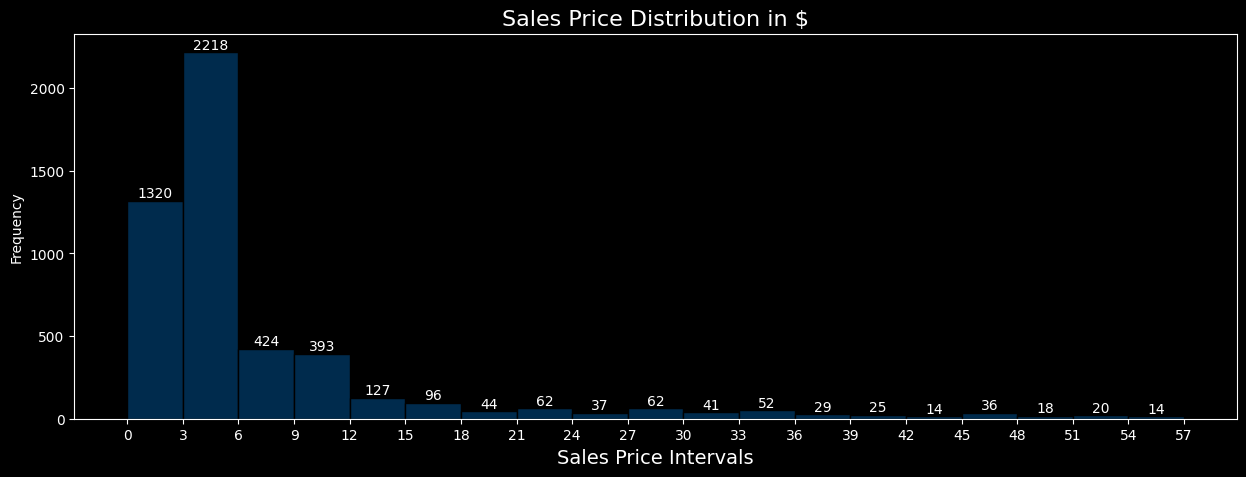

In [9]:
#Plotting a histogram of the sales price distribution
plt.style.use('dark_background')
plt.figure(figsize=(15, 5))
counts, bins, patches = plt.hist(df_az['sales_price'], bins=np.arange(0, 60, 3), edgecolor='black', color='#002b4d')

# Set x-axis tick positions and labels
plt.xticks(np.arange(0, 60, 3))

# Add frequency count labels on top of each bar
for count, x in zip(counts, bins):
    x_center = (x + bins[bins.searchsorted(x) + 1]) / 2  # Calculate the center of the bin
    plt.text(x_center, count, str(int(count)), ha='center', va='bottom') #Add text to the plot

#Set labels
plt.xlabel('Sales Price Intervals', fontsize=14)
plt.ylabel('Frequency')
plt.title('Sales Price Distribution in $', fontsize=16)

**The majority of the products in the sample are between 0 and 6 dollars.**

In [10]:
#Calculate weight intervals for 20 bins in the histogram
bin_width = (df_az['weight_grams'].max() - df_az['weight_grams'].min())/20
custom_bins = np.arange(df_az['weight_grams'].min(),df_az['weight_grams'].max(), bin_width)

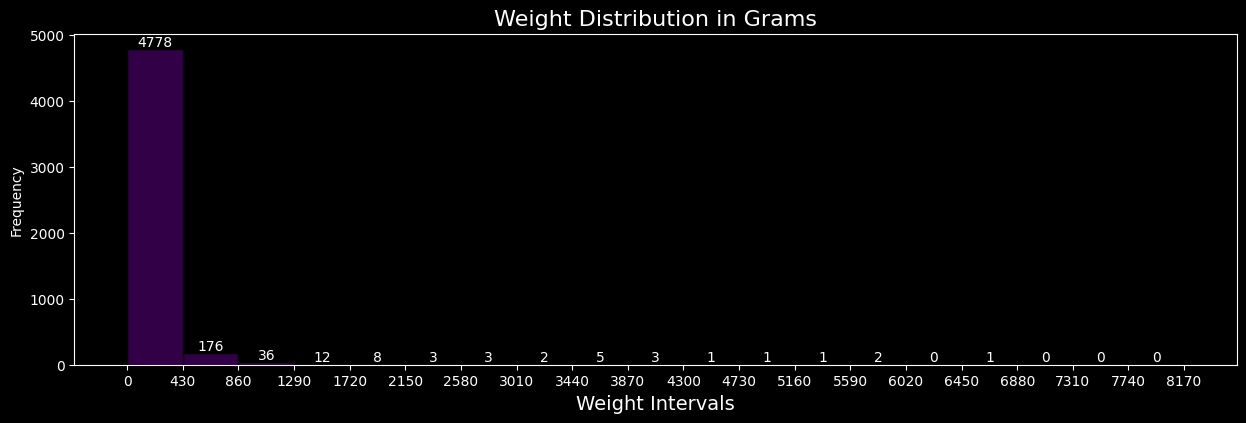

In [11]:
#Plot a histogram of the distribution of weight
plt.style.use('dark_background')
plt.figure(figsize=(15, 4.3))
counts, bins, patches = plt.hist(df_az['weight_grams'], bins=custom_bins, edgecolor='black', color='#310047')

# Add frequency count labels on top of each bar
for count, x in zip(counts, bins):
    x_center = (x + bins[bins.searchsorted(x) + 1]) / 2  # Calculate the center of the bin
    plt.text(x_center, count, str(int(count)), ha='center', va='bottom')

# Set x-axis tick positions and labels
plt.xticks(custom_bins)

#Set labels and title
plt.xlabel('Weight Intervals', fontsize=14)
plt.ylabel('Frequency')
plt.title('Weight Distribution in Grams', fontsize=16)
plt.show()

In [12]:
#Calculating the cumulative frequency of the weight intervals
inter = pd.interval_range(0,8170,19)
freq = pd.DataFrame({'Interval': inter, 'Count': counts})
freq['Cumulative_Frequency_%'] = freq['Count'].cumsum()/freq['Count'].sum()*100
#Getting the first interval with the most products
freq.iloc[0]

Interval                   (0, 430]
Count                        4778.0
Cumulative_Frequency_%    94.952305
Name: 0, dtype: object

#### 95% of the products in the sample are between 0 and 430 grams.

In [13]:
#Separating the sample into 2 between heavy and light products
heavy_products = df_az[df_az['weight_grams'] > 430]
light_products = df_az[df_az['weight_grams'] < 430]

### Exploring the Correlation between variables

#### Comparing the correlations of light and heavy products

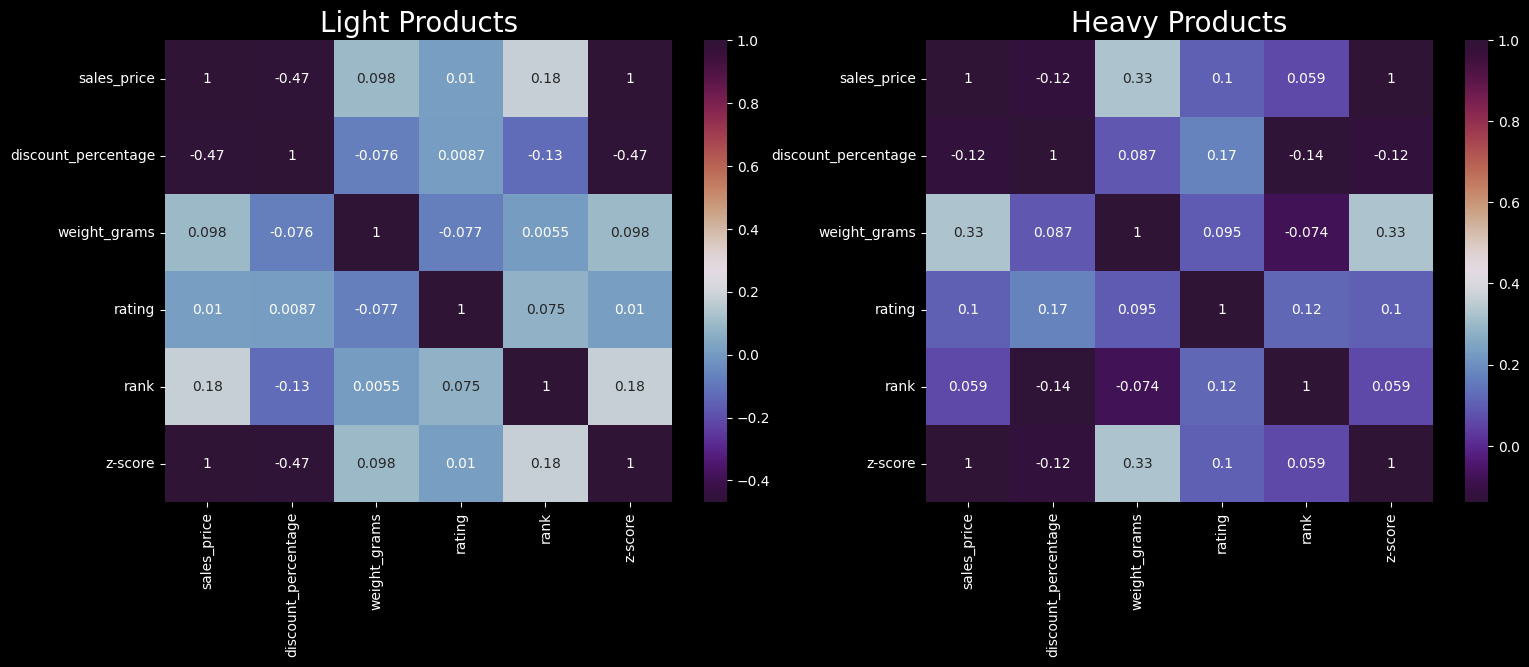

In [14]:
#Plotting correlation heatmaps in one figure
plt.style.use('dark_background')
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

plt.style.use('dark_background')
sns.heatmap(light_products.corr(numeric_only=True), annot=True, cmap='twilight_shifted', ax=ax[0])
ax[0].set_title('Light Products', fontsize=20)

sns.heatmap(heavy_products.corr(numeric_only=True), annot=True, cmap='twilight_shifted', ax=ax[1])
ax[1].set_title('Heavy Products', fontsize=20)

plt.show()

#### Compare the relationship between sales price and weight of the light and heavy products

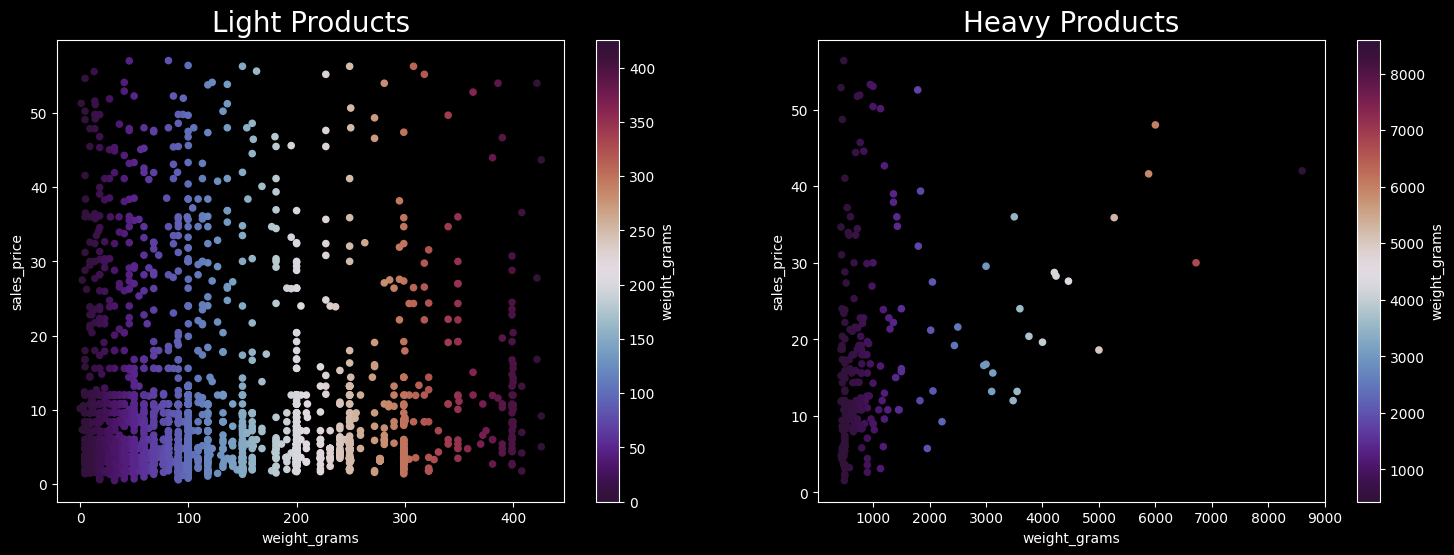

In [15]:
#Scatter plots for comparing the relationships
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

plt.style.use('dark_background')
light_products.plot.scatter(x='weight_grams', y='sales_price', c='weight_grams', cmap='twilight_shifted', ax=ax[0])
ax[0].set_title('Light Products', fontsize=20)

heavy_products.plot.scatter(x='weight_grams', y='sales_price', c='weight_grams', cmap='twilight_shifted', ax=ax[1])
ax[1].set_title('Heavy Products', fontsize=20)

plt.show()

#### Insights about the relationships:
* The **havier products** have **higher correlation** between the different value pairs
* The values in the light products sample are mostly independent from one another
* There's a **high negative correlation** between the **discount %** and the **price** in the **light** products sample
    -  The **higher the price**, the **lower the discount** and the other way around
* The **highest correlation** is between the **sales price and weight** of the **heavy** products

There isn't an obvious relationship between the price and weight of the light and heavy products. <br>
The only apparent **positive relationship** is between the **price and weight of the heaviest products**.

### *Preferred delivery type for the heavy products - DS or FBA on the BB*

In [16]:
#Frequency distribution table for the unique delivery types of the heavy products sample
frequency_table = heavy_products.groupby('delivery_type').size().reset_index(name='count')

#Calculate the cumulative frequency of the different delivery types
frequency_table['cum_fr_%'] = frequency_table['count'].cumsum()/frequency_table['count'].sum()*100
frequency_table

,delivery_type,count,cum_fr_%
0,fulfilled_by_amazon,192,75.294118
1,fulfilled_by_merchant,63,100.000000


Text(0.5, 1.0, 'Preferred delivery type - Heavy products')

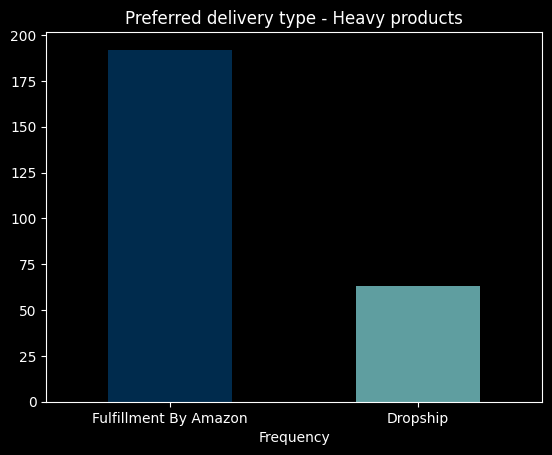

In [17]:
frequency_table.plot.bar(x='delivery_type', y='count',color=['#002b4d', '#5f9ea0'], legend=False)

#Set custom labels
plt.xticks(frequency_table.index, labels=['Fulfillment By Amazon', 'Dropship'], rotation=0)
plt.xlabel('Delivery Type')
plt.xlabel('Frequency')
plt.title('Preferred delivery type - Heavy products')

#### 75% of the heavy products are sold on Amazon using the FBA delivery type
+ If the products we buy are heavy it'll be a better decision to use the FBA delivery type because **most of the buyboxes are taken by the FBA sellers** and at the same time, if we have a warehouse, the heavier products won't take so much space.
+ Also, it's harder to compete with FBA sellers if you're selling using dropship delivery, because the FBA sellers with low prices have more priority, which may slow down the volume of products we're selling

#### A Stacked Bar chart of the number of products each brand has with the preferred delivery type

Text(0.5, 1.0, 'Top 20 Brands with the most products and their Delivery Types')

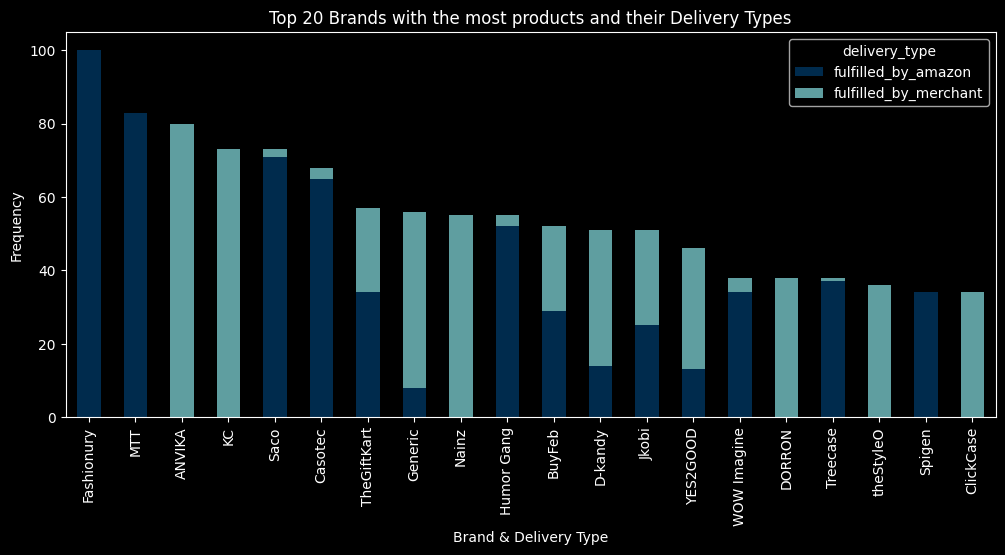

In [18]:
#Group data by brand and get the instances of delivery types for each brand and convert to wide format
brand_delivery = light_products.groupby(['brand', 'delivery_type']).size().unstack()

#Sort the number of brands in descending order and get the ordered indexes 
brnd = brand_delivery.sum(axis=1).sort_values(ascending=False).index

#Put together the sorted by brands df with count in DS and FBA
brand_delivery = brand_delivery.loc[brnd] 

#Plot the top 20 brands with the most products and their preferred delivery type
brand_delivery[:20].plot.bar(stacked=True, figsize=(12,5),color=['#002b4d', '#5f9ea0'])
plt.xlabel('Brand & Delivery Type')
plt.ylabel('Frequency')
plt.title('Top 20 Brands with the most products and their Delivery Types')

#### Depending on the Brand, the shipping type can vary a lot.

## Top 10 brands based on average rating, average rank and average number of products

In [19]:
#Create a new df of the unique brands and the number of listings they're on in the sample
brand_count = light_products.groupby(['brand'])['asin'].count().sort_values(ascending=False).reset_index()

In [20]:
#Construct a df with the avg rating and rank of every brand
avg_r = light_products.groupby(['brand'])[['rating', 'rank']].mean().reset_index()

#Join the two dfs into one
brand_rating = brand_count.merge(avg_r, on='brand')

#Set a threshold for the number of products a brand has, 
#and the lowest average rating a brand can have 
brand_count_average = brand_rating[(brand_rating['asin'] > 15) & (brand_rating['rank'] > brand_rating['rank'].mean())]

#Convert the Rank values to integers
brand_count_average['rank'] = brand_count_average['rank'].astype('int64')

#Sort the values in descending order and get the top 10 products
top_10_rating = brand_count_average.sort_values(by=['rating', 'rank'], ascending=False).reset_index(drop=True).head(10)
top_10_rating

,brand,asin,rating,rank
0,Cover Affair,33,4.596970,639318
1,CK With CaseKaro,22,4.404545,663092
2,FCS,18,4.372222,1238981
3,Treecase,38,4.363158,588316
4,ClickCase,34,4.341176,609723
5,YuBingo,19,4.226316,823195
6,Casotec,68,4.204412,570209
7,KLD,19,4.200000,1093142
8,SDO,28,4.200000,671642
9,theStyleO,36,4.166667,993736


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8316\3273119380.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_10_rating['brand'], rotation=15)


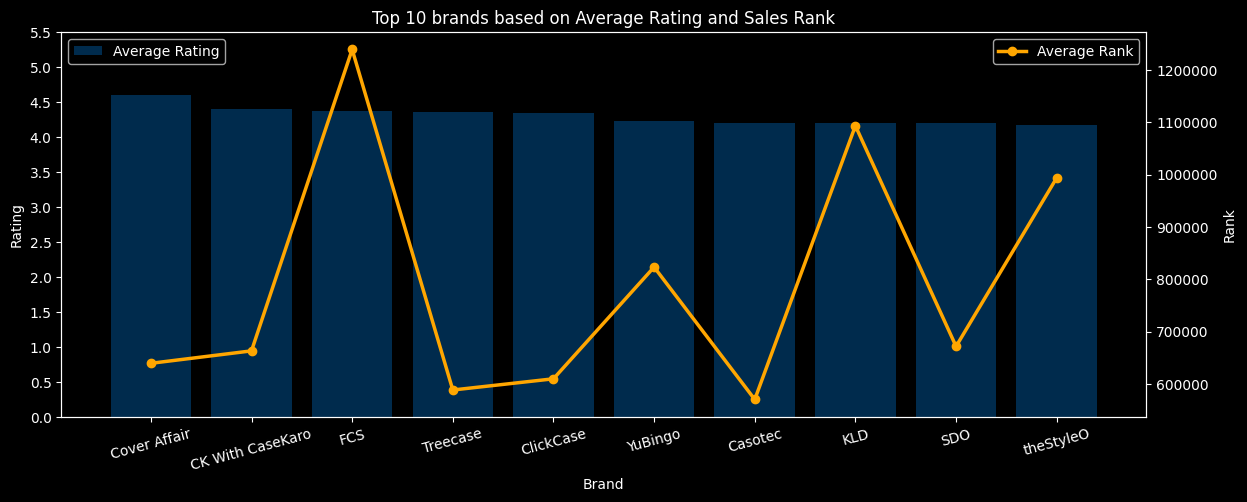

In [21]:
# Create the figure and the primary y-axis bar plot
fig, ax1 = plt.subplots(figsize=(14, 5))
ax1.bar(top_10_rating['brand'], top_10_rating['rating'], color='#002b4d', label='Average Rating')

# Create the secondary y-axis line plot using twinx
ax2 = ax1.twinx()
ax2.plot(top_10_rating['brand'], top_10_rating['rank'], color='#ffa600', marker='o', label='Average Rank', linewidth=2.5)

# Set custom y-axis ticks
ax1.set_yticks(np.arange(0, max(top_10_rating['rating']) + 1, 0.5))

# Format secondary y-axis labels as plain decimal numbers
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

#Rotate the x-axis tick labels so they can be more readable
ax1.set_xticklabels(top_10_rating['brand'], rotation=15)

# Set labels and legends
ax1.set_title('Top 10 brands based on Average Rating and Sales Rank')
ax1.set_ylabel('Rating')
ax1.set_xlabel('Brand')
ax2.set_ylabel('Rank')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

### Insights:

- The **rating** and **the number of listings*t a brand has, **may not be enough** to decide hwether or not you should try selling those products
- The better approach will be to focus on products from the top 10 brands that ha a **higaverage e rating ana l averagege rank**
- **Example** - The FCS brand h a high average rating but their produts ha a very high ranso an the producmayare  benot that plopuar amayare not sing as much as the other brands from the top 10
- **Suggestion** - Focus on the first 4 brands(except for FCS) because they have the highest chance of having more sales, thanks to their good average rating and rank

### Average Selling Price and Discount of the Top 20 Brands based on their Average Rating

In [22]:
#Create a new df including the count of asins of each brand,
#avg price and avg discount using groupby() and merge()
avg_price = light_products.groupby(['brand'])[['sales_price','discount_percentage']].mean().reset_index()
brand_price_discount = brand_count_average.merge(avg_price, on='brand')

#Get the top 20 brands based on Rating and Rank
top_20_avg_price = brand_price_discount.sort_values(by=['rating', 'rank'], ascending=False).reset_index(drop=True).head(20)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8316\2935642346.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_20_avg_price['brand'], rotation=50)


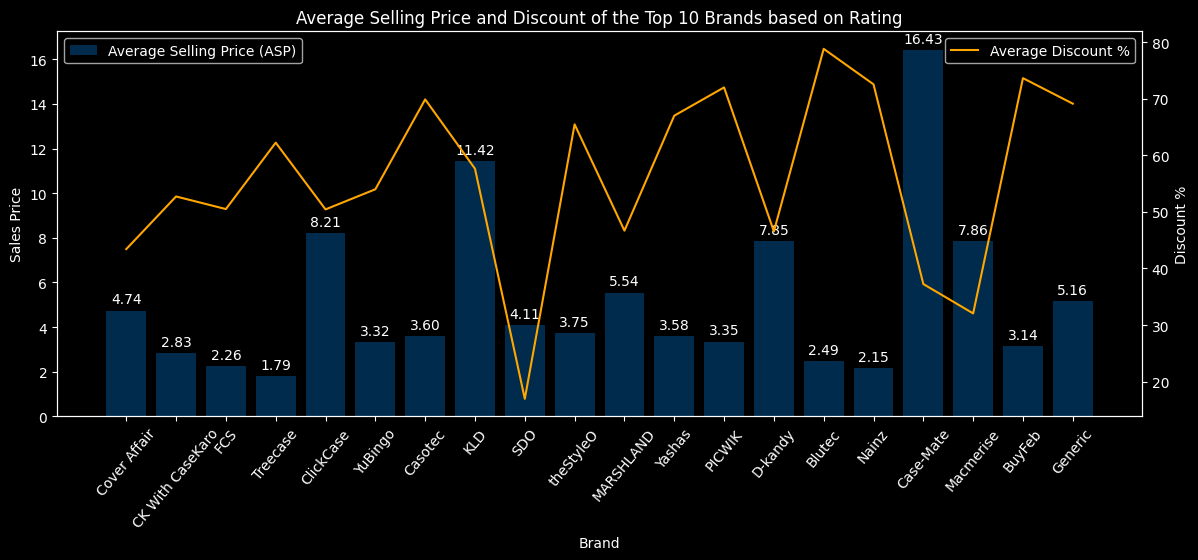

In [23]:
#Plot the avg price and discount for each brand 
fig, ax1 = plt.subplots(figsize=(14, 5))
bars = ax1.bar(top_20_avg_price['brand'], top_20_avg_price['sales_price'], color='#002b4d', label='Average Selling Price (ASP)')

# Create the secondary y-axis line plot using twinx
ax2 = ax1.twinx()
ax2.plot(top_20_avg_price['brand'], top_20_avg_price['discount_percentage'], color='#ffa600', label='Average Discount %')

#Rotate the x-axis tick labels so they can be more readable
ax1.set_xticklabels(top_20_avg_price['brand'], rotation=50)

#Show the avg price of the brands over each bar
for bar in bars:
   height = bar.get_height()
   ax1.annotate(f'{height:.2f}',  # Format the value with 2 decimal places
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Set labels and legends
ax1.set_title('Average Selling Price and Discount of the Top 10 Brands based on Rating')
ax1.set_ylabel('Sales Price')
ax1.set_xlabel('Brand')
ax2.set_ylabel('Discount %')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

#### Overall, in the light products sample, the products have very low prices but also very high discount percentage.

### Is the rating higher for products that have prime or not?

In [24]:
light_products['amazon_prime__y_or_n'].value_counts()

amazon_prime__y_or_n
Y    3841
N     937
Name: count, dtype: int64

In [25]:
heavy_products['amazon_prime__y_or_n'].value_counts()

amazon_prime__y_or_n
Y    201
N     54
Name: count, dtype: int64

In [26]:
prime_light = light_products.groupby('amazon_prime__y_or_n')[['rating','rank']].mean().reset_index()
prime_light

,amazon_prime__y_or_n,rating,rank
0,N,4.117716,742020.014941
1,Y,4.045092,476577.410049


In [27]:
prime_heavy = heavy_products.groupby('amazon_prime__y_or_n')[['rating','rank']].mean().reset_index()
prime_heavy

,amazon_prime__y_or_n,rating,rank
0,N,4.096296,374715.092593
1,Y,3.956716,383980.726368


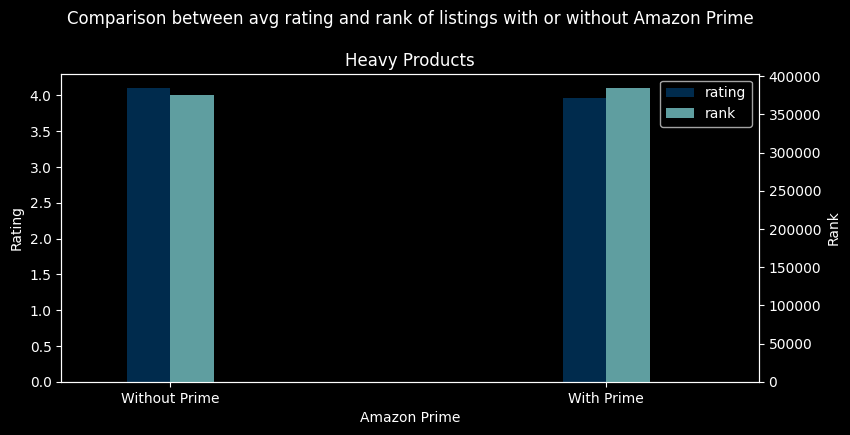

In [28]:
fig, ax = plt.subplots(figsize=(9,4))
ax2 = ax.twinx()

prime_heavy['rating'].plot(kind='bar', color='#002b4d', ax=ax, width=0.10, position=1)
prime_heavy['rank'].plot(kind='bar', color='#5f9ea0', ax=ax2, width=0.10, position=0)


ax.set_title('Comparison between avg rating and rank of listings with or without Amazon Prime\n\nHeavy Products')
ax.set_xlabel('Amazon Prime')
ax.set_xticklabels(['Without Prime', 'With Prime'], rotation=0)
ax.set_ylabel('Rating')
ax2.set_ylabel('Rank')

h, l = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
plt.legend(h+h2, l+l2, loc='upper right')

plt.show()

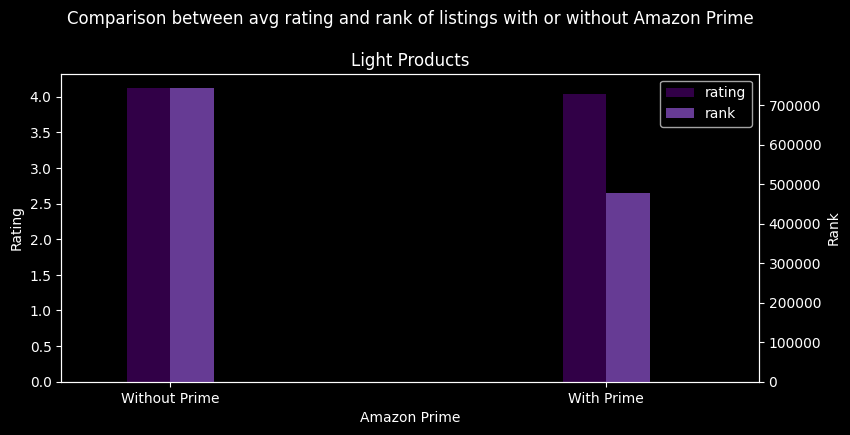

In [29]:
fig, ax = plt.subplots(figsize=(9,4))
ax2 = ax.twinx()

prime_light['rating'].plot(kind='bar', color='#310047', ax=ax, width=0.10, position=1)
prime_light['rank'].plot(kind='bar', color='#663b94', ax=ax2, width=0.10, position=0)


ax.set_title('Comparison between avg rating and rank of listings with or without Amazon Prime\n\nLight Products')
ax.set_xlabel('Amazon Prime')
ax.set_xticklabels(['Without Prime', 'With Prime'], rotation=0)
ax.set_ylabel('Rating')
ax2.set_ylabel('Rank')

h, l = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
plt.legend(h+h2, l+l2, loc='upper right')

plt.show()

### Insights about Prime:
* There isn't a significant difference between the average rating, with or without prime, for both heavy and light products
* However, there's a **significant difference** between the **average rank** for the **light products**
  * Listings that **have Prime** have much **lower Rank** in comparison with listings without that option
    * So, listings with Prime may have much **more exposure** and possibly **sell more** 

### Top 20 light products to sell on Amazon from the sample
#### Which are the most expensive products that are light and have rating higher than 4.5?

In [30]:
price_order_light = light_products.sort_values(by=['sales_price', 'weight_grams'], ascending=[False, True])
price_order_light = price_order_light[(price_order_light['weight_grams'] < price_order_light['weight_grams'].mean()) \
                    & (price_order_light['rating'] > 4.5) \
                    & (price_order_light['rank'] < price_order_light['rank'].mean())]

price_order_light_top_20 = price_order_light[['asin','product_name', 'sales_price', \
                           'discount_percentage', 'delivery_type', 'rank']].head(20).reset_index(drop=True)
price_order_light_top_20

,asin,product_name,sales_price,discount_percentage,delivery_type,rank
0,B00BR1QCN0,Blackbeery Leather Flip Shell for BlackBerry Q...,54.64,9,fulfilled_by_merchant,500162
1,B00439G59E,Targus PA248U5 Laptop Chill Mat (Black),51.28,14,fulfilled_by_merchant,175630
2,B0099YS6WW,Sony ADPAMA Shoe Adapter (Black),49.79,8,fulfilled_by_merchant,392004
3,B00ZYNH8FI,SanDisk Ultra Micro SD UHS-I 200GB Flash Memor...,49.19,18,fulfilled_by_merchant,528046
4,B073GM45W1,elago AirPods Leather Case [Brown] - [Genuine ...,47.63,20,fulfilled_by_merchant,244171
5,B01BWEH2JE,ProCase Plastic Leather Stand Folio Case Cover...,43.31,20,fulfilled_by_merchant,52476
6,B009AQP6Z4,6 UnitÃ©s Oral-B Precision Clean Eb20For Elect...,41.94,72,fulfilled_by_merchant,53810
7,B07Q85XJ6M,SoundPEATS Bluetooth Headphones Wireless Earbu...,38.39,18,fulfilled_by_amazon,23024
8,B0756TQ1PL,Flip Cover Case for Apple iPad Pro 10.5 (2017)...,35.99,14,fulfilled_by_merchant,128207
9,B0013J0502,Giotto's AA1903 Rocket Air Blaster Large-Red,35.99,40,fulfilled_by_merchant,489375


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8316\3092705018.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(price_order_light_top_20['asin'], rotation=50)


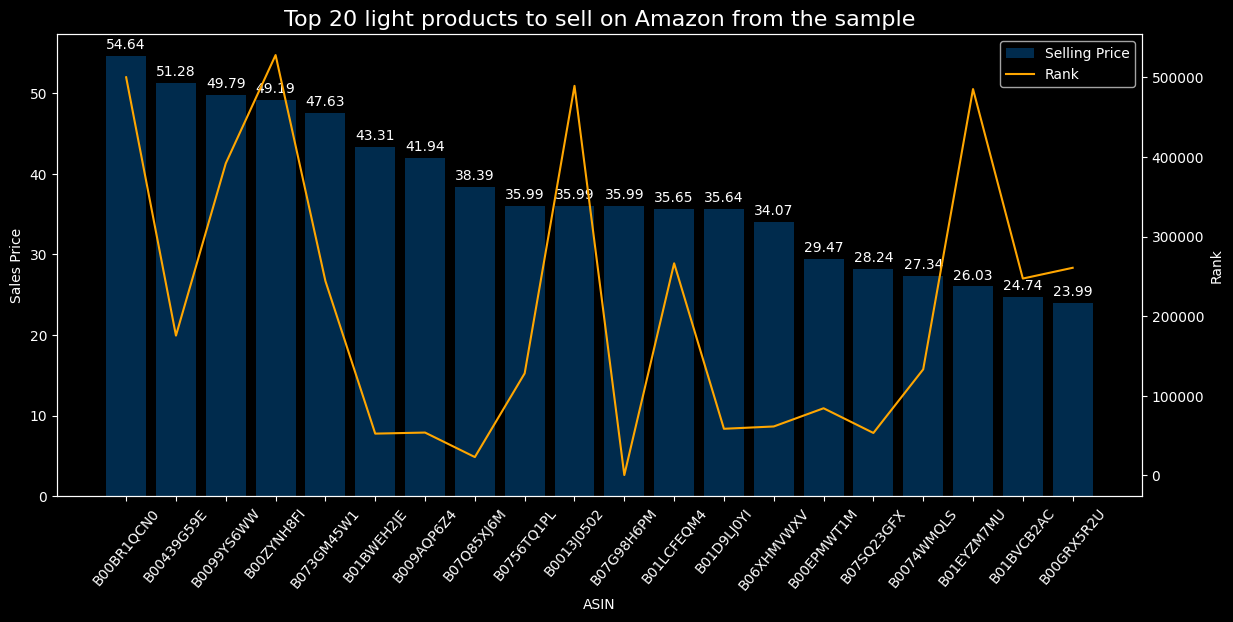

In [31]:
#Plot the avg price and discount for each brand 
fig, ax1 = plt.subplots(figsize=(14, 6))
bars = ax1.bar(price_order_light_top_20['asin'], price_order_light_top_20['sales_price'], color='#002b4d', label='Selling Price')

# Create the secondary y-axis line plot using twinx
ax2 = ax1.twinx()
ax2.plot(price_order_light_top_20['asin'], price_order_light_top_20['rank'], color='#ffa600', label='Rank')

#Rotate the x-axis tick labels so they can be more readable
ax1.set_xticklabels(price_order_light_top_20['asin'], rotation=50)

#Show the avg price of the brands over each bar
for bar in bars:
   height = bar.get_height()
   ax1.annotate(f'{height:.2f}',  # Format the value with 2 decimal places
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

#Set labels and legends
ax1.set_title('Top 20 light products to sell on Amazon from the sample', fontsize=16)
ax1.set_ylabel('Sales Price')
ax1.set_xlabel('ASIN')
ax2.set_ylabel('Rank')

h, l = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
plt.legend(h+h2, l+l2, loc='upper right')

# Show the plot
plt.show()

#### Insights:
Using the top 20 table and chart, we can place test orders for the following models, as they are very **stable in terms of price, weight, rating and rank**
- The price range from \\$24 to \\$54 is good for light products because you **won't have high shipping fees**, as well as Amazon fees
    - **more room for profit**
    - **easier to get the buyboxes** (more room on the price/cost)
- The products have very high rating and higher than the average rank for the sample
    - **low-risk ite
  Suggestion: *
- Focus on the Amazon listings with the lowest rank, as there's more chance for them to have sales

### Top 20 Sellers with the most products and their preferred Delivery Types

Text(0.5, 1.0, 'Top 20 Sellers with the most products and their Delivery Types')

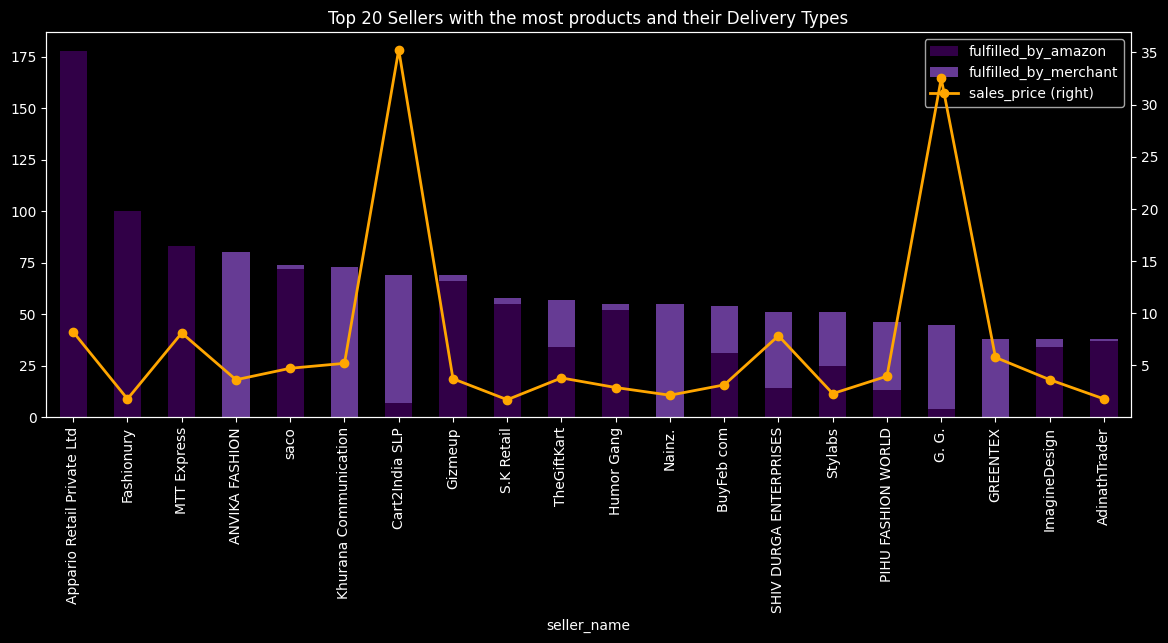

In [32]:
seller_price = light_products.groupby(['seller_name'])['sales_price'].mean()

#Group data by brand and get the instances of delivery types for each brand and convert to wide format
seller_delivery = light_products.groupby(['seller_name', 'delivery_type']).size().unstack()

#Sort the number of brands in descending order and get the ordered indexes 
brnd = seller_delivery.sum(axis=1).sort_values(ascending=False).index

#Put together the sorted by brands df with count in DS nd FBA
seller_delivery = seller_delivery.loc[brnd] 

p_d = seller_delivery.merge(seller_price, on='seller_name')

#Plot the top 20 brands with the most products and their preferred delivery type
ax = p_d[:20].plot.bar(y=['fulfilled_by_amazon', 'fulfilled_by_merchant'], stacked=True,figsize=(14,5),color=['#310047', '#663b94'])
p_d[:20].plot( y='sales_price',ax=ax, use_index=False, secondary_y=True, color='#ffa600', marker='o', linewidth=2)

ax.set_xticklabels(p_d[:20].index, rotation=90)


plt.title('Top 20 Sellers with the most products and their Delivery Types')

### Insights:
* The **top 3 Sellers** prefer only **FBA as their shipping type**
* Most of the seller in the top 20 have **between 50 and 75 products** on Amazon
* There are only 2 sellers that sell products over $30, all others have an ASP in the range \\$2-\\$10
* For selling products using **dropship delivery**, it may be a good idea to check the types
of products that ANVIKA FASHION, Khurana Communication and Nainz are selling because there may be a **higher chance of getting the DS buyboxes**, which will lead to more sales
     * The same thing goes for sellers using only **FBA**(products of the **top 3 sellers**)

### Which are the most frequently used meta keywords for the light products?

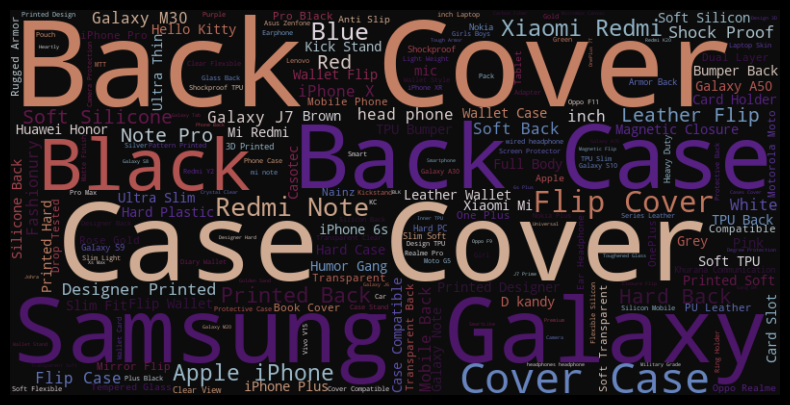

In [33]:
# Combine the strings into a single text
words_combined = ' '.join(light_products['meta_keywords'])

# Create and generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='#0c0c0c', colormap='twilight_shifted').generate(words_combined)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Insights:
- Majority of the products are **Phone Cases or other phone accessories**
    - That will explain why almost all of the products in the Electronics dataset are **light and have very low prices**
- We can assume that **phone case listings have very volatile prices** because of the **averge discount percentage being 57%**
- The plot can help us if we're entering the Amazon phone accessories market and we want to create a **completely new listing**
    - we can get the most frequently used words gathered from all listings in the sample